In [ ]:
%pip install tensorflow



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install tqdm

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------------- ---------- 41.0/57.6 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 751.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import cv2 as cv
import os


Data Check

In [2]:
img_path = "Training/Training/Angry/Angry-1.jpg"
img = image.load_img("Training/Training/Angry/Angry-1.jpg")

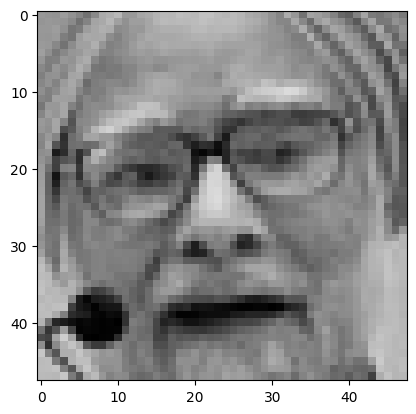

In [ ]:
plt.imshow(img)

In [ ]:
cv.imread(img_path).shape

(48, 48, 3)

Load Data

In [3]:
train_dir = ('Training/Training/')
test_dir = ('Testing/Testing/')

In [4]:
def load_data(dir_path, img_size):
   
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv.imread(dir_path + path + '/' + file)
                    img = img.astype('float32') / 255
                    resized = cv.resize(img, img_size, interpolation = cv.INTER_AREA)
                    X.append(resized)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [5]:
img_size = (48, 48)

In [6]:
X_train, y_train, train_labels = load_data(train_dir, img_size)

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [04:19<00:00, 43.22s/it] 


28273 images loaded from Training/Training/ directory.


In [7]:
train_labels

{0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Suprise'}

In [8]:
X_test, y_test, test_labels = load_data(test_dir, img_size)

100%|██████████| 6/6 [01:23<00:00, 13.93s/it]


7067 images loaded from Testing/Testing/ directory.


In [9]:
Y_train = to_categorical(y_train, num_classes=6)
Y_train.shape

(28273, 6)

In [10]:
Y_test = to_categorical(y_test, num_classes=6)
Y_test.shape

(7067, 6)

Model Building

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [12]:
model = Sequential()

In [13]:
# Concolutional Layer

# Layer pertama
model.add(Conv2D(32, (3, 3), activation='leaky_relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D((2, 2)))

# Layer kedua
model.add(Conv2D(64, (3, 3), activation='leaky_relu'))
model.add(MaxPooling2D((2, 2)))

# Layer ketiga
model.add(Conv2D(128, (3, 3), activation='leaky_relu'))
model.add(MaxPooling2D((2, 2)))

In [14]:
# Layer Flatten dan Dense
model.add(Flatten())
model.add(Dense(128, activation='leaky_relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [15]:
# Kompilasi model
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

In [16]:
# Melatih model
history = model.fit(X_train, Y_train, epochs=25, batch_size=64, validation_data=(X_test, Y_test))

# Evaluasi model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/25



442/442 [==============================] - 143s 294ms/step - loss: 1.5659 - accuracy: 0.3697 - val_loss: 1.3666 - val_accuracy: 0.4754
Epoch 2/25
442/442 [==============================] - 110s 248ms/step - loss: 1.3146 - accuracy: 0.4910 - val_loss: 1.2425 - val_accuracy: 0.5185
Epoch 3/25
442/442 [==============================] - 114s 259ms/step - loss: 1.1993 - accuracy: 0.5385 - val_loss: 1.1953 - val_accuracy: 0.5346
Epoch 4/25
442/442 [==============================] - 114s 258ms/step - loss: 1.1272 - accuracy: 0.5666 - val_loss: 1.1587 - val_accuracy: 0.5557
Epoch 5/25
442/442 [==============================] - 113s 256ms/step - loss: 1.0567 - accuracy: 0.6006 - val_loss: 1.1538 - val_accuracy: 0.5487
Epoch 6/25
442/442 [==============================] - 110s 250ms/step - loss: 0.9909 - accuracy: 0.6237 - val_loss: 1.1607 - val_accuracy: 0.5752
Epoch 7/25
442/442 [==============================] - 110s 249ms/step - loss: 0.9314 - accuracy: 0.6469 - val_loss: 1.1793 - val_accura